# 🏥 Hospital Patient Data Analysis
This notebook analyzes hospital patient records to extract insights that could be valuable for hospital management and planning.

**Objectives:**
- Determine the average length of stay by department
- Identify the most common procedures in each department
- Examine the distribution of patients by diagnosis

Let's begin with the data analysis.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## 📌 1. Average Length of Stay by Department

In [10]:
df = pd.read_csv("hospital_patient_data.csv")
df

,Patient_ID,Age,Gender,Diagnosis,Length_of_Stay,Procedure,Department,Total_Bill,Insurance_Coverage (%),Readmitted (Yes/No)
0,1,69,Male,Cancer,9,Imaging,General,16368,70,No
1,2,32,Male,Heart Disease,13,Medication,Endocrinology,122360,67,No
2,3,89,Female,Cancer,2,Imaging,Oncology,122755,52,Yes
3,4,78,Male,Hypertension,4,Medication,Oncology,66985,91,No
4,5,38,Female,Cancer,6,Surgery,Pulmonology,60069,88,Yes
...,...,...,...,...,...,...,...,...,...,...
295,296,34,Male,Heart Disease,1,Therapy,Endocrinology,67993,98,No
296,297,50,Female,Hypertension,6,Surgery,Endocrinology,17421,90,Yes
297,298,26,Male,Heart Disease,7,Surgery,Pulmonology,27727,66,No
298,299,60,Female,Diabetes,3,Therapy,Cardiology,122418,58,No


 1. What is the average length of stay by department?

## 📌 2. Most Common Procedures in Each Department

In [11]:
ave_len_stay_by_dept = df.groupby("Department")["Length_of_Stay"].mean().sort_values(ascending=True)
ave_len_stay_by_dept

Department
Cardiology       6.741935
Oncology         7.114754
Pulmonology      7.431034
Endocrinology    7.518519
General          8.169231
Name: Length_of_Stay, dtype: float64

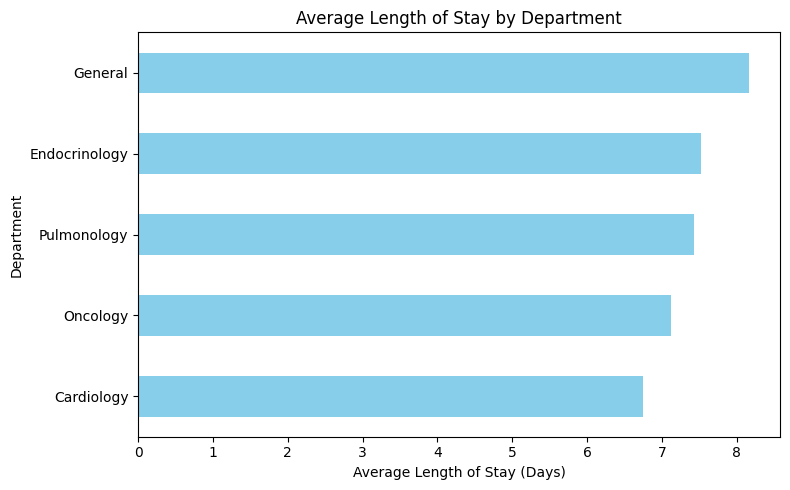

In [17]:
ave_len_stay_by_dept.plot(kind="barh",color='skyblue', figsize=(8,5))
plt.xlabel("Average Length of Stay (Days)")
plt.title("Average Length of Stay by Department")
plt.tight_layout()

## 📌 3. Distribution of Patients by Diagnosis

 Insight: Patients tend to stay the longest in the General department and shortest in Cardiology.

Which procedures are most common in each department?

In [33]:
com_proc_dept = df.groupby("Department")["Procedure"].agg(lambda x:x.mode().iloc[0] if not x.mode().empty else "N/A")
com_proc_dept

Department
Cardiology          Therapy
Endocrinology    Medication
General             Surgery
Oncology            Imaging
Pulmonology      Medication
Name: Procedure, dtype: object

Insight: Each department has a dominant procedure type, reflecting their specialization.



What is the distribution of patients by diagnosis?

In [40]:

# Count of patients by diagnosis
diagnosis_counts = df['Diagnosis'].value_counts()
diagnosis_counts

Cancer           70
Diabetes         63
Hypertension     62
Asthma           54
Heart Disease    51
Name: Diagnosis, dtype: int64

Text(0.5, 0, 'Number Of Patients')

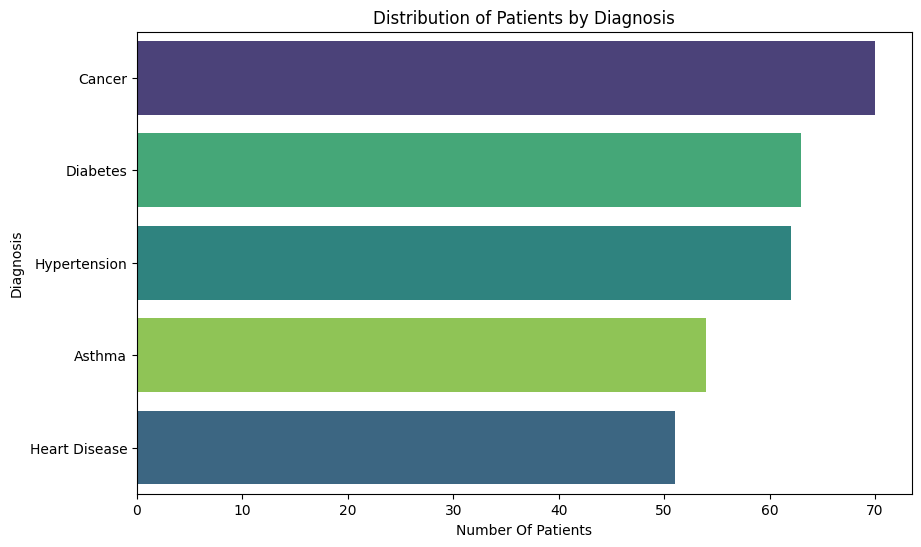

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,  y="Diagnosis", hue='Diagnosis', order=diagnosis_counts.index, palette="viridis")
plt.title("Distribution of Patients by Diagnosis")
plt.xlabel("Number Of Patients")

Insight: Cancer and diabetes are the most common diagnoses among patients in this dataset.

Are older patients more likely to be readmitted?

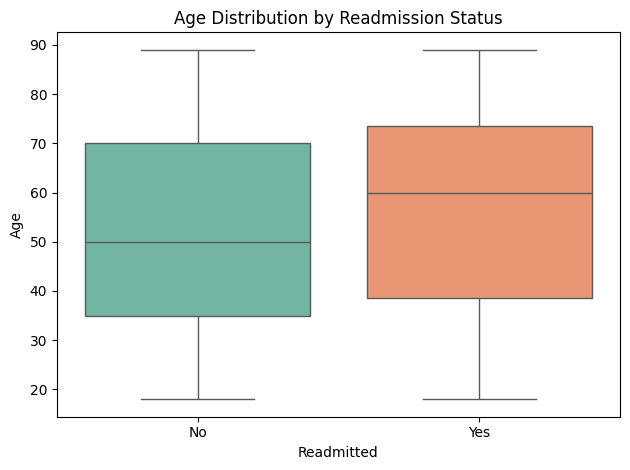

In [58]:
sns.boxplot(data=df, x="Readmitted (Yes/No)", hue="Readmitted (Yes/No)", y="Age",palette="Set2", legend=False)
plt.title('Age Distribution by Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

 Insight: Yes, readmitted patients tend to be slightly older, suggesting age may influence readmission likelihood.

In [60]:
mean_age_by_readmission = df.groupby("Readmitted (Yes/No)")["Age"].mean()
mean_age_by_readmission

Readmitted (Yes/No)
No     51.839024
Yes    55.705263
Name: Age, dtype: float64

Does insurance coverage influence total bill amounts?

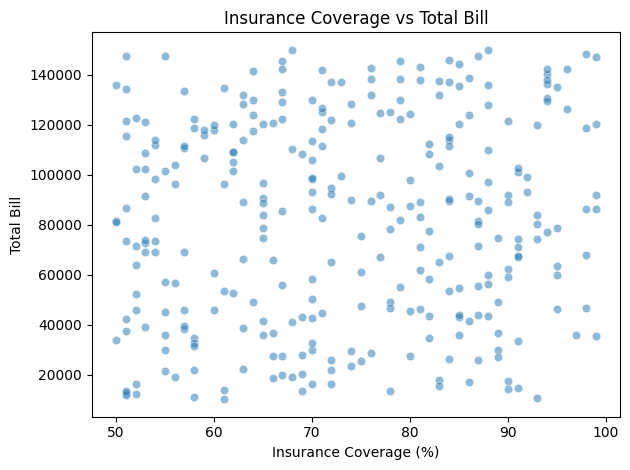

In [65]:
sns.scatterplot(data=df, x="Insurance_Coverage (%)", y="Total_Bill", alpha=0.5)
plt.title('Insurance Coverage vs Total Bill')
plt.xlabel('Insurance Coverage (%)')
plt.ylabel('Total Bill')
plt.tight_layout()
plt.show()

In [67]:
corr = df["Total_Bill"].corr(df["Insurance_Coverage (%)"])
corr

0.09259570740893647

There is a very weak positive correlation, indicating that insurance coverage does not strongly influence total hospital bills.

In [69]:
avg_stay_by_readmission = df.groupby("Readmitted (Yes/No)")["Length_of_Stay"].mean()
avg_stay_by_readmission

Readmitted (Yes/No)
No     7.292683
Yes    7.631579
Name: Length_of_Stay, dtype: float64

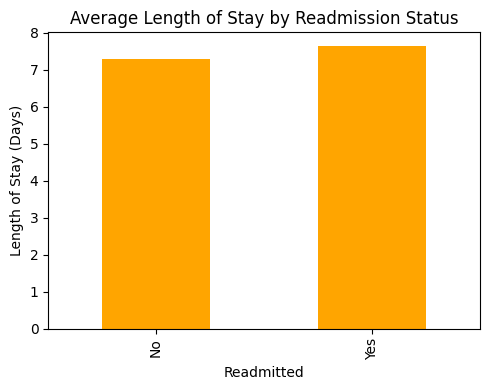

In [72]:
avg_stay_by_readmission.plot(kind="bar", color='orange', figsize=(5, 4))
plt.title('Average Length of Stay by Readmission Status')
plt.ylabel('Length of Stay (Days)')
plt.xlabel('Readmitted')
plt.tight_layout()
plt.show()

Insight: Readmitted patients stayed slightly longer on average, suggesting extended stays could be a marker of complications.



## ✅ Conclusion
- Patients tend to stay longest in the **General** department.
- Each department has a **dominant procedure**, indicating specialization.
- Diagnosis distribution shows key areas of patient inflow.

Further work can explore predictive modeling and dashboard creation using tools like Streamlit or Power BI.